   Delivery Time  Sorting Time
0          21.00            10
1          13.50             4
2          19.75             6
3          24.00             9
4          29.00            10
       Delivery Time  Sorting Time
count      21.000000     21.000000
mean       16.790952      6.190476
std         5.074901      2.542028
min         8.000000      2.000000
25%        13.500000      4.000000
50%        17.830000      6.000000
75%        19.750000      8.000000
max        29.000000     10.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 468.0 bytes
None


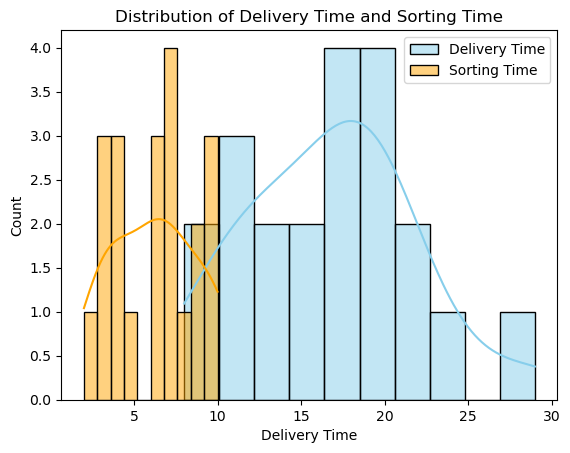

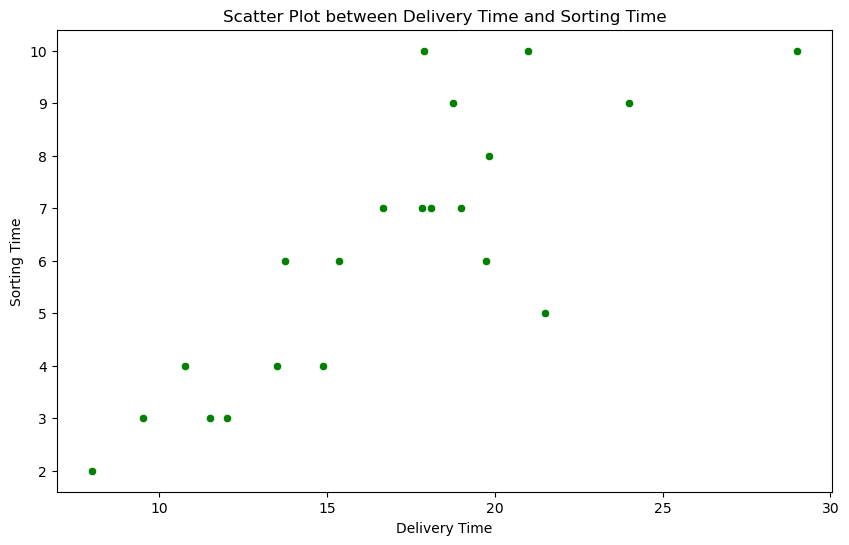

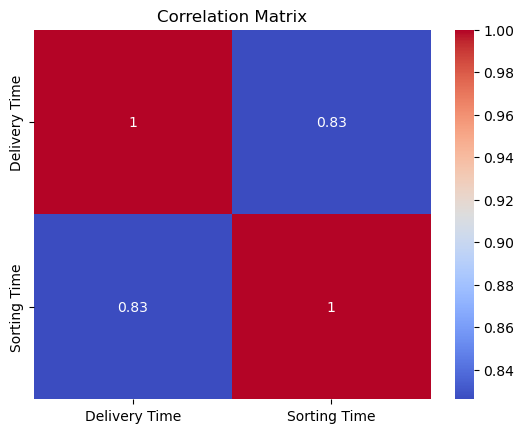

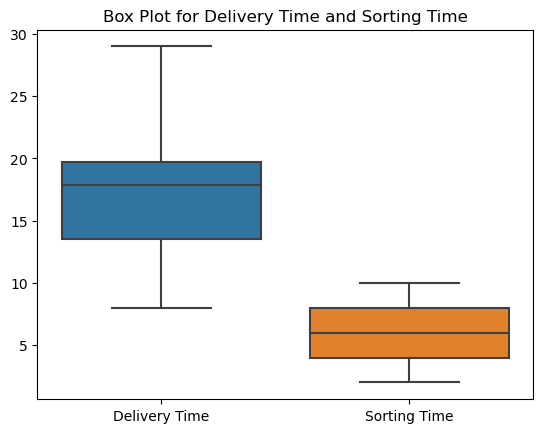

Train Error [RMSE]: 2.543
R square: 0.443
Test Error [RMSE]: 3.979
R square: 0.673
R square: 0.682
               Model  R-squared
0  Linear Regression   0.682271


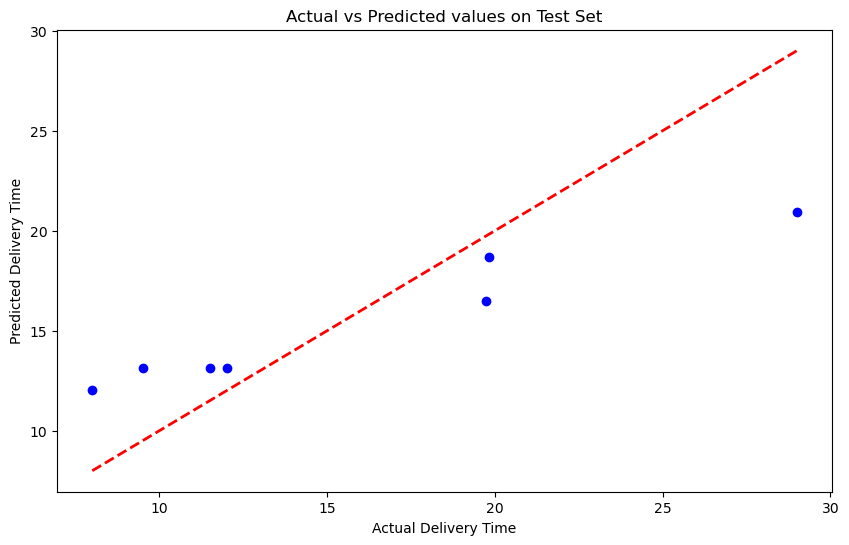

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

df=pd.read_csv("C:\\Users\\shash\\Downloads\\delivery_time.csv")
list(df)

print(df.head())
print(df.describe())
print(df.info())
df.isnull().sum()

sns.histplot(data=df, x='Delivery Time', kde=True, bins=10, color='skyblue', label='Delivery Time')
sns.histplot(data=df, x='Sorting Time', kde=True, bins=10, color='orange', label='Sorting Time')
plt.title('Distribution of Delivery Time and Sorting Time')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Delivery Time', y='Sorting Time', data=df, color='green')
plt.title('Scatter Plot between Delivery Time and Sorting Time')
plt.xlabel('Delivery Time')
plt.ylabel('Sorting Time')
plt.show()

correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

sns.boxplot(data=df[['Delivery Time', 'Sorting Time']])
plt.title('Box Plot for Delivery Time and Sorting Time')
plt.show()

outlier_threshold = 1.5
for column in df.columns:
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - outlier_threshold * iqr
    upper_bound = q3 + outlier_threshold * iqr
    
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    
    if not outliers.empty:
        print(f"Outliers in {column}:")
        print(outliers)
        print("\n")

Y=df["Delivery Time"]
X=df[["Sorting Time"]]


from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.30)


from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X_train,Y_train)


Y_pred_train = LR.predict(X_train)
Y_pred_test  = LR.predict(X_test)


from sklearn.metrics import mean_squared_error,r2_score
error1 = np.sqrt(mean_squared_error(Y_train ,Y_pred_train))
print("Train Error [RMSE]:", error1.round(3))
print("R square:", r2_score(Y_train ,Y_pred_train).round(3))

error2 = np.sqrt(mean_squared_error(Y_test ,Y_pred_test))
print("Test Error [RMSE]:", error2.round(3))
print("R square:", r2_score(Y_test ,Y_pred_test).round(3))


LR.fit(X, Y)
Y_pred = LR.predict(X)
r2 = r2_score(Y, Y_pred)
print("R square:", r2.round(3))


r2 = pd.DataFrame({'Model':['Linear Regression'] , 'R-squared': r2})
print(r2)


plt.figure(figsize=(10, 6))
plt.scatter(Y_test, Y_pred_test, color='blue')
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], linestyle='--', color='red', linewidth=2)
plt.title('Actual vs Predicted values on Test Set')
plt.xlabel('Actual Delivery Time')
plt.ylabel('Predicted Delivery Time')
plt.show()